<a href="https://colab.research.google.com/github/Hindikafalar/BackEnd-Project/blob/main/%5BTUR%5D_M5L3_%5Bexample%5D_NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Temel NLTK işlevleri


## Kitaplıkları içe aktarma

In [1]:
!pip install wordcloud
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
from matplotlib import pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
text ='''
Hubble ve James Webb Uzay Teleskopları Güçlerini Birleştirdi

MACS0416 isimli gök ada kümesinin bu fotoğrafı, James Webb Uzay Teleskobu’nun kızılötesi dalga boyunda yaptığı gözlemler ile Hubble Uzay Teleskobu’nun görünür bölge dalga boyundaki gözlemlerinin birleştirilmesi ile elde edildi.

Gök ada kümeleri birbirine kütle çekim etkisi ile bağlı gök adalardan oluşan gök ada gruplarıdır. Genellikle 100 ya da daha az gök ada içerirler. Einstein’ın genel görelilik kuramına göre ışık, gök ada kümesi gibi güçlü kütle çekim alanlarından geçerken sapar. Bu durum, daha uzaktaki gök adaların olduğundan daha büyük görünmesine yol açar. Bu olay kütle çekimsel mercekleme olarak isimlendirilir.

MACS0416 Gök Ada Kümesi 4,3 milyar ışık yılı uzağımızda bulunuyor. MACS0416 Gök Ada Kümesi’nin güçlü kütle çekim alanı, uzaktaki gök adaların daha büyük görünmesini sağlıyor. Bu sayede gök bilimciler MACS0416 Gök Ada Kümesi’nde yer alan çok uzaktaki yıldızları ve süpernovaları dahi tespit edebildiler.
          '''

## Metni cümlelere ayırma

In [12]:
sentences = sent_tokenize(text, language='turkish')

print(20 * "-")
print(sentences)
print(20 * "-")
print("Toplam cümle: ", len(sentences))

--------------------
['\nHubble ve James Webb Uzay Teleskopları Güçlerini Birleştirdi\n\nMACS0416 isimli gök ada kümesinin bu fotoğrafı, James Webb Uzay Teleskobu’nun kızılötesi dalga boyunda yaptığı gözlemler ile Hubble Uzay Teleskobu’nun görünür bölge dalga boyundaki gözlemlerinin birleştirilmesi ile elde edildi.', 'Gök ada kümeleri birbirine kütle çekim etkisi ile bağlı gök adalardan oluşan gök ada gruplarıdır.', 'Genellikle 100 ya da daha az gök ada içerirler.', 'Einstein’ın genel görelilik kuramına göre ışık, gök ada kümesi gibi güçlü kütle çekim alanlarından geçerken sapar.', 'Bu durum, daha uzaktaki gök adaların olduğundan daha büyük görünmesine yol açar.', 'Bu olay kütle çekimsel mercekleme olarak isimlendirilir.', 'MACS0416 Gök Ada Kümesi 4,3 milyar ışık yılı uzağımızda bulunuyor.', 'MACS0416 Gök Ada Kümesi’nin güçlü kütle çekim alanı, uzaktaki gök adaların daha büyük görünmesini sağlıyor.', 'Bu sayede gök bilimciler MACS0416 Gök Ada Kümesi’nde yer alan çok uzaktaki yıldızları

## Etkisiz kelimeleri silme

In [13]:
stop_words = set(stopwords.words('turkish'))

print(10 * "-", " etkisiz kelimeler ", 10 * "-")
print(stop_words)
print(20 * "-")

----------  etkisiz kelimeler  ----------
{'biri', 'çünkü', 'nasıl', 'nerede', 'tüm', 'ki', 'eğer', 'defa', 'şu', 'ama', 'da', 'gibi', 'birkaç', 'kim', 'nereye', 'mu', 'ne', 'her', 've', 'nerde', 'veya', 'ile', 'bazı', 'o', 'az', 'neden', 'kez', 'niye', 'sanki', 'ya', 'daha', 'diye', 'siz', 'biz', 'hep', 'acaba', 'de', 'ise', 'şey', 'yani', 'mü', 'bu', 'niçin', 'çok', 'hepsi', 'hem', 'belki', 'birşey', 'aslında', 'için', 'en', 'mı', 'hiç'}
--------------------


--------------------
['Hubble', 've', 'James', 'Webb', 'Uzay', 'Teleskopları', 'Güçlerini', 'Birleştirdi', 'MACS0416', 'isimli', 'gök', 'ada', 'kümesinin', 'bu', 'fotoğrafı', ',', 'James', 'Webb', 'Uzay', 'Teleskobu', '’', 'nun', 'kızılötesi', 'dalga', 'boyunda', 'yaptığı', 'gözlemler', 'ile', 'Hubble', 'Uzay', 'Teleskobu', '’', 'nun', 'görünür', 'bölge', 'dalga', 'boyundaki', 'gözlemlerinin', 'birleştirilmesi', 'ile', 'elde', 'edildi', '.', 'Gök', 'ada', 'kümeleri', 'birbirine', 'kütle', 'çekim', 'etkisi', 'ile', 'bağlı', 'gök', 'adalardan', 'oluşan', 'gök', 'ada', 'gruplarıdır', '.', 'Genellikle', '100', 'ya', 'da', 'daha', 'az', 'gök', 'ada', 'içerirler', '.', 'Einstein', '’', 'ın', 'genel', 'görelilik', 'kuramına', 'göre', 'ışık', ',', 'gök', 'ada', 'kümesi', 'gibi', 'güçlü', 'kütle', 'çekim', 'alanlarından', 'geçerken', 'sapar', '.', 'Bu', 'durum', ',', 'daha', 'uzaktaki', 'gök', 'adaların', 'olduğundan', 'daha', 'büyük', 'görünmesine', 'yol', 'açar', '.', 'Bu', 'olay', 'kütle', '

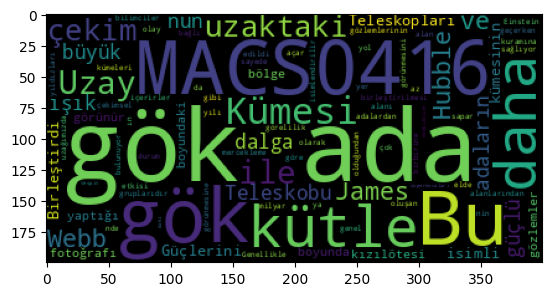

In [14]:
words = word_tokenize(text)

print( 20 * "-")
print(words)
print(20 * "-")
print("Metninizdeki toplam kelime sayısı: ", len(words))
print(20 * "-")

wc = WordCloud().generate(' '.join([i for i in words]))
plt.imshow(wc)

----------  Etkisiz kelimeler hariç küçük harfli kelimeler  ----------
['hubble', 'james', 'webb', 'uzay', 'teleskopları', 'güçlerini', 'birleştirdi', 'isimli', 'gök', 'ada', 'kümesinin', 'fotoğrafı', 'james', 'webb', 'uzay', 'teleskobu', 'nun', 'kızılötesi', 'dalga', 'boyunda', 'yaptığı', 'gözlemler', 'hubble', 'uzay', 'teleskobu', 'nun', 'görünür', 'bölge', 'dalga', 'boyundaki', 'gözlemlerinin', 'birleştirilmesi', 'elde', 'edildi', 'gök', 'ada', 'kümeleri', 'birbirine', 'kütle', 'çekim', 'etkisi', 'bağlı', 'gök', 'adalardan', 'oluşan', 'gök', 'ada', 'gruplarıdır', 'genellikle', 'gök', 'ada', 'içerirler', 'einstein', 'ın', 'genel', 'görelilik', 'kuramına', 'göre', 'ışık', 'gök', 'ada', 'kümesi', 'güçlü', 'kütle', 'çekim', 'alanlarından', 'geçerken', 'sapar', 'durum', 'uzaktaki', 'gök', 'adaların', 'olduğundan', 'büyük', 'görünmesine', 'yol', 'açar', 'olay', 'kütle', 'çekimsel', 'mercekleme', 'olarak', 'isimlendirilir', 'gök', 'ada', 'kümesi', 'milyar', 'ışık', 'yılı', 'uzağımızda', 'b

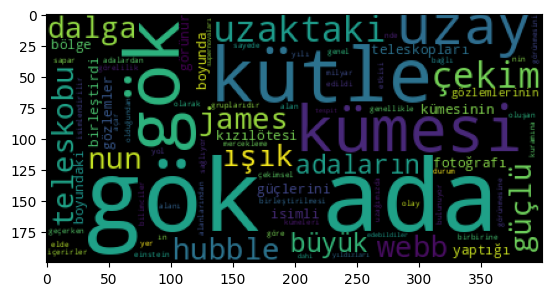

In [15]:
words = [word.lower() for word in words if word.isalpha()]
words = [word for word in words if word not in stop_words]

print(10 * "-", " Etkisiz kelimeler hariç küçük harfli kelimeler ", 10 * "-")
print(words)
print(20 * "-")
print("Metninizdeki toplam kelime sayısı:", len(words))
print(20 * "-")

wc = WordCloud().generate(' '.join([i for i in words]))
plt.imshow(wc)

## Lematizasyon

----------  Kelimelerin Başlangıç Hali  ----------
['hubble', 'james', 'webb', 'uzay', 'teleskopları', 'güçlerini', 'birleştirdi', 'isimli', 'gök', 'ada', 'kümesinin', 'fotoğrafı', 'james', 'webb', 'uzay', 'teleskobu', 'nun', 'kızılötesi', 'dalga', 'boyunda', 'yaptığı', 'gözlemler', 'hubble', 'uzay', 'teleskobu', 'nun', 'görünür', 'bölge', 'dalga', 'boyundaki', 'gözlemlerinin', 'birleştirilmesi', 'elde', 'edildi', 'gök', 'ada', 'kümeleri', 'birbirine', 'kütle', 'çekim', 'etkisi', 'bağlı', 'gök', 'adalardan', 'oluşan', 'gök', 'ada', 'gruplarıdır', 'genellikle', 'gök', 'ada', 'içerirler', 'einstein', 'ın', 'genel', 'görelilik', 'kuramına', 'göre', 'ışık', 'gök', 'ada', 'kümesi', 'güçlü', 'kütle', 'çekim', 'alanlarından', 'geçerken', 'sapar', 'durum', 'uzaktaki', 'gök', 'adaların', 'olduğundan', 'büyük', 'görünmesine', 'yol', 'açar', 'olay', 'kütle', 'çekimsel', 'mercekleme', 'olarak', 'isimlendirilir', 'gök', 'ada', 'kümesi', 'milyar', 'ışık', 'yılı', 'uzağımızda', 'bulunuyor', 'gök', 'a

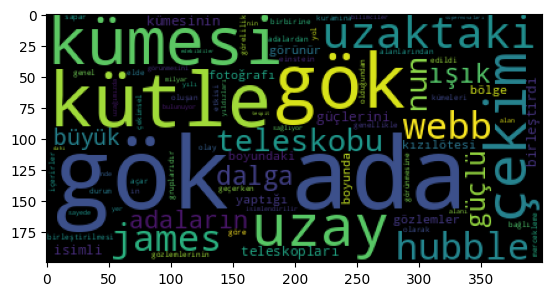

In [16]:
lemmatizer = WordNetLemmatizer()

words = [lemmatizer.lemmatize(word) for word in words]

print(10 * "-", " Kelimelerin Başlangıç Hali ", 10 * "-")
print(words)
print(20 * "-")
print("Metninizdeki toplam kelime sayısı: ", len(words))
print(20 * "-")

wc = WordCloud().generate(' '.join([i for i in words]))
plt.imshow(wc)

## Her bir cümlenin frekansını hesaplayın


In [17]:
freq_dist = FreqDist(words)
sentence_scores = {}

for i, sentence in enumerate(sentences):
    sentence_words = word_tokenize(sentence.lower())
    sentence_score = sum([freq_dist[word] for word in sentence_words if word in freq_dist])

    sentence_scores[i] = sentence_score

sentence_scores

{0: 70, 1: 66, 2: 22, 3: 44, 4: 24, 5: 9, 6: 30, 7: 56, 8: 49}

## Cümleleri frekansına göre sıralama

In [18]:
sorted_scores = sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True)

sorted_scores

[(0, 70),
 (1, 66),
 (7, 56),
 (8, 49),
 (3, 44),
 (6, 30),
 (4, 24),
 (2, 22),
 (5, 9)]

## Özet oluşturma

In [19]:
selected_sentences = sorted_scores[:1]
selected_sentences = sorted(selected_sentences)

# Özet oluşturma
summary = ' '.join([sentences[i] for i, _ in selected_sentences])
print(summary)


Hubble ve James Webb Uzay Teleskopları Güçlerini Birleştirdi

MACS0416 isimli gök ada kümesinin bu fotoğrafı, James Webb Uzay Teleskobu’nun kızılötesi dalga boyunda yaptığı gözlemler ile Hubble Uzay Teleskobu’nun görünür bölge dalga boyundaki gözlemlerinin birleştirilmesi ile elde edildi.
